In [1]:
import adi #ADIinstruments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
file = "./raw/wave_plo_pps.adicht"

In [3]:
data = adi.read_file(file)

In [4]:
data.channels

[        h: <cdata 'struct ADI_FileHandle__ * *' owning 8 bytes>
        id: 1
 n_records: 1
   tick_dt: [1.0416666666666666e-05]
   records: Type::list, Len: 1
      name: Channel 1
     units: ['ADC Units']
 n_samples: [151147200]
        dt: [1.0416666666666666e-05]
        fs: [96000.0],
         h: <cdata 'struct ADI_FileHandle__ * *' owning 8 bytes>
        id: 2
 n_records: 1
   tick_dt: [1.0416666666666666e-05]
   records: Type::list, Len: 1
      name: Channel 2
     units: ['ADC Units']
 n_samples: [151147200]
        dt: [1.0416666666666666e-05]
        fs: [96000.0],
         h: <cdata 'struct ADI_FileHandle__ * *' owning 8 bytes>
        id: 3
 n_records: 1
   tick_dt: [1.0416666666666666e-05]
   records: Type::list, Len: 1
      name: Channel 3
     units: ['ADC Units']
 n_samples: [151147200]
        dt: [1.0416666666666666e-05]
        fs: [96000.0],
         h: <cdata 'struct ADI_FileHandle__ * *' owning 8 bytes>
        id: 4
 n_records: 1
   tick_dt: [1.0416666666666

In [5]:
151147200*1/96000/60

26.240833333333335

In [6]:
#chn2 =data.channels[1]
waves = {"pps": data.channels[0].get_data(1), "signal": data.channels[1].get_data(1)}

In [16]:
with open("structinfo.txt", "w") as f:
    f.write("PPS & SIGNAL\n")
    f.write(str(data.channels))
    f.close()

In [26]:
96000*3600*24/5

1658880000.0

In [8]:
(len(waves["pps"]))

151147200

In [28]:
2000001600/96000/3600

5.787041666666666

In [9]:

df = pd.DataFrame(waves)
#df[""] = chn2.get_data(1)
#df[2] = chn2.get_data(2)
#df[3] = chn2.get_data(3)
#df[4] = chn2.get_data(4)



In [10]:
len(df)

151147200

In [ ]:
import 

In [7]:
x = df.signal[:2**15]

0          24.0
1       -1134.0
2         387.0
3         350.0
4         231.0
          ...  
32763    -695.0
32764    1121.0
32765     526.0
32766    -873.0
32767    -146.0
Name: signal, Length: 32768, dtype: float32

In [18]:
df.head()

,pps,signal
0,159.0,24.0
1,152.0,-1134.0
2,166.0,387.0
3,175.0,350.0
4,157.0,231.0


<Axes: >

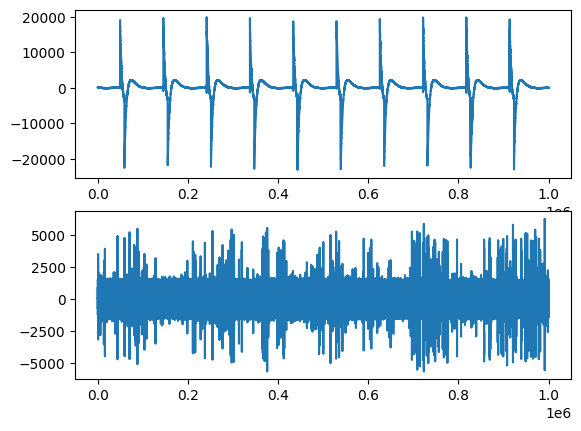

In [24]:
plt.subplot(211)
df.iloc[:1000000,0].plot()

plt.subplot(212)
df.iloc[:1000000,1].plot()

In [8]:
x = data.channels[].get_data(5)

SyntaxError: invalid syntax (1214374265.py, line 1)

In [9]:
plt.plot(x[:2000])

NameError: name 'x' is not defined

KeyError: 1

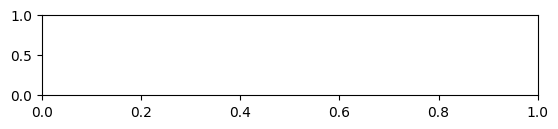

In [10]:
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.plot(df[i].iloc[:3000000])
# cond 

In [23]:
df = data.channels[1]

In [11]:
import scipy

In [17]:
len(df[i])

2000001600

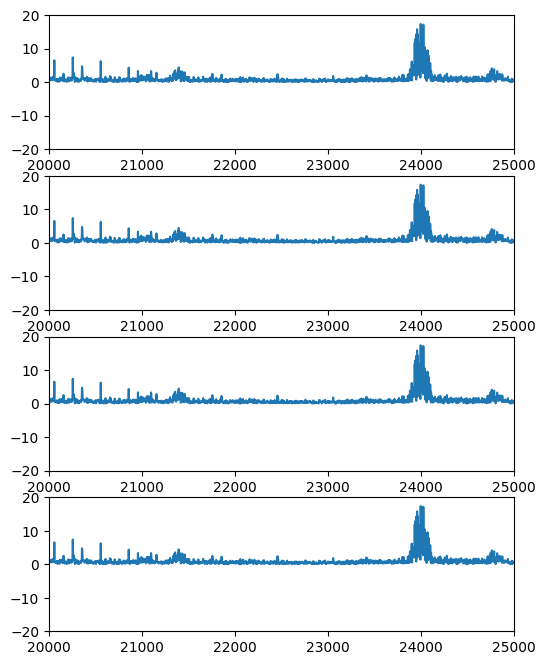

In [12]:
plt.figure(figsize=(6,8))

f = scipy.fft.fftfreq(30000, 1/96000)
for i in range(1,5):
    s = scipy.fft.fft(df["signal"].iloc[:30000].values)/30e3
    plt.subplot(4,1,i)
    plt.plot(scipy.fft.fftshift(f),np.abs(scipy.fft.fftshift(s)))    
    plt.ylim(-20,20)
    plt.xlim(20e3, 25e3)

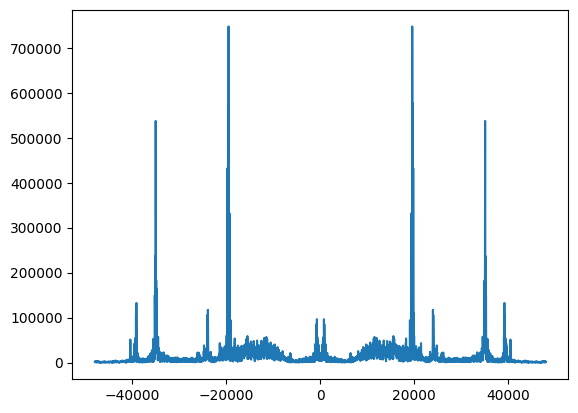

In [16]:
fft_npts = 2**12
fs =96e3
s = df.signal[:fft_npts]
ff = scipy.fft.fftfreq(fft_npts, 1/fs)
X = scipy.fft.fft(s.values, fft_npts)
plt.plot(scipy.fft.fftshift(ff),scipy.fft.fftshift(abs(X)))

## Finally ...
hemos resuelto que el archivo adicht contiene los datos de toda la adqisición por bloques de 5.7 horas (por algún tema de capacidad... I guess...)

In [33]:
for i in range(len(chn2.records)):
    with open(f"savnet_24h_p{i+1}.npy", "wb") as f:
        np.save(f, chn2.get_data(i+1))

In [36]:
df.shape[0]/96e3/3600

0.4373472222222222

In [11]:
df.to_csv("data_raw_26min.csv")

KeyboardInterrupt: 

In [ ]:
1+1

In [12]:
len(df)

151147200

In [14]:
with open("./raw/data_raw_26m.npy", "wb") as f:
    np.save(f, df.values)

In [15]:
data = np.load("./raw/data_raw_26m.npy")

In [18]:
data.shape

(151147200, 2)

In [17]:
df

,pps,signal
0,159.0,24.0
1,152.0,-1134.0
2,166.0,387.0
3,175.0,350.0
4,157.0,231.0
...,...,...
151147195,-63.0,-699.0
151147196,-56.0,-969.0
151147197,-47.0,532.0
151147198,-64.0,413.0
